# <span style="color:red; font-family: Arial;">Forecasting - COCACOLA data</span>

# Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf,pacf , adfuller
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='rainbow')
plt.rcParams['figure.figsize'] = (10,5)

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">* Forecast the CocaCola prices Passengers data set </h3>
<h3 style="color:blue; font-family: Arial;">* Prepare a document for each model explaining how many dummy variables you have  created and RMSE value for each model.<h3>


# 2 - Data Collection

In [2]:
df = pd.read_excel('./CocaCola_Sales_Rawdata.xlsx',index_col=0)
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


# 3 - EDA / VISUALIZATION / DATA PREPROCESSING

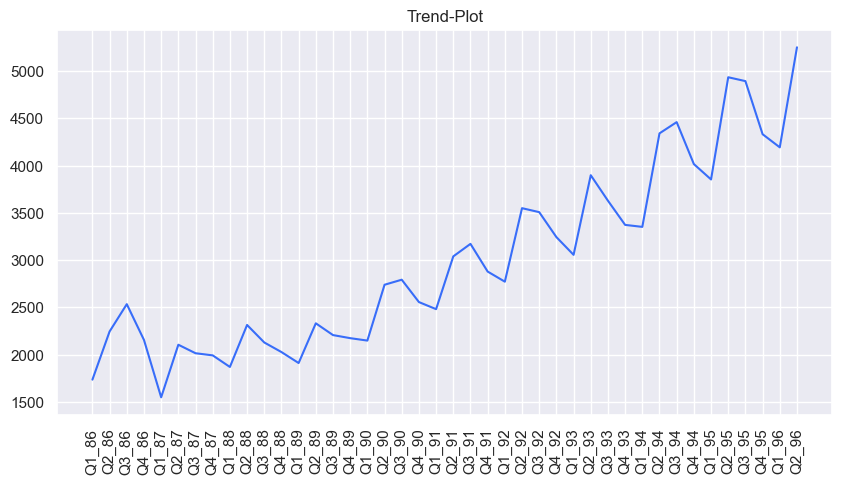

In [3]:
plt.plot(df.index,df['Sales'].values)
plt.title('Trend-Plot')
plt.xticks(rotation=90)
plt.show()

In [4]:
adf = adfuller(df['Sales'])
adf[1]

0.9966611673930905

<h2 style="color:blue; font-family: Arial;">Observation :</h2>

<h3 style="color:black; font-family: Arial;"> We can clearly see that there is upward trend and multiplicative seasonality.<h3>

<h2 style="color:red; font-family: Arial;">ARIMA Models can only work with stationary data.</h2>


In [6]:
# Differencing
df['First Order'] = df['Sales'].diff()
df

,Sales,First Order
Quarter,,
Q1_86,1734.827000,NaN
Q2_86,2244.960999,510.133999
Q3_86,2533.804993,288.843994
Q4_86,2154.962997,-378.841995
Q1_87,1547.818996,-607.144001
Q2_87,2104.411995,556.592999
Q3_87,2014.362999,-90.048996
Q4_87,1991.746998,-22.616001
Q1_88,1869.049999,-122.696999


###  _Differencing is used to stationaries any data_

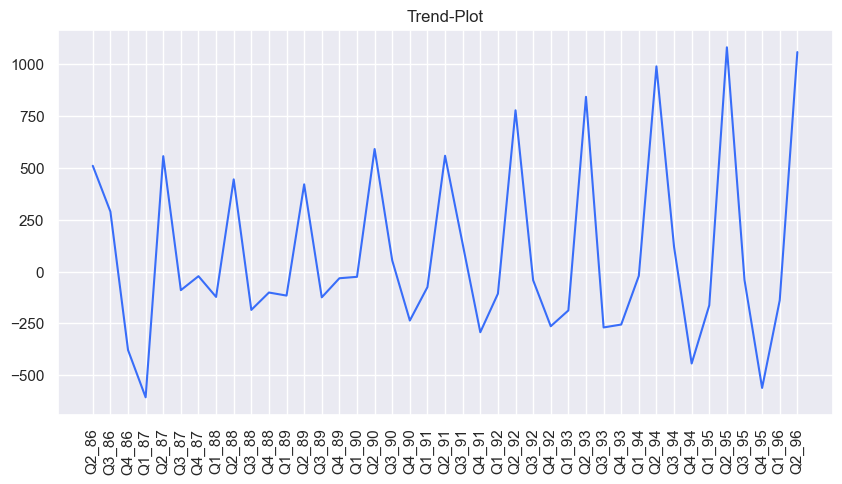

In [7]:
plt.plot(df.index[1:],df['First Order'][1:].values)
plt.title('Trend-Plot')
plt.xticks(rotation=90)
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation :</h2>

<h3 style="color:black; font-family: Arial;"> We can observe that we can see seasonality but not trend<h3>

In [8]:
# Differencing
df['Second Order'] = df['First Order'].diff()
df

,Sales,First Order,Second Order
Quarter,,,
Q1_86,1734.827000,NaN,NaN
Q2_86,2244.960999,510.133999,NaN
Q3_86,2533.804993,288.843994,-221.290005
Q4_86,2154.962997,-378.841995,-667.685989
Q1_87,1547.818996,-607.144001,-228.302006
Q2_87,2104.411995,556.592999,1163.737000
Q3_87,2014.362999,-90.048996,-646.641994
Q4_87,1991.746998,-22.616001,67.432995
Q1_88,1869.049999,-122.696999,-100.080997


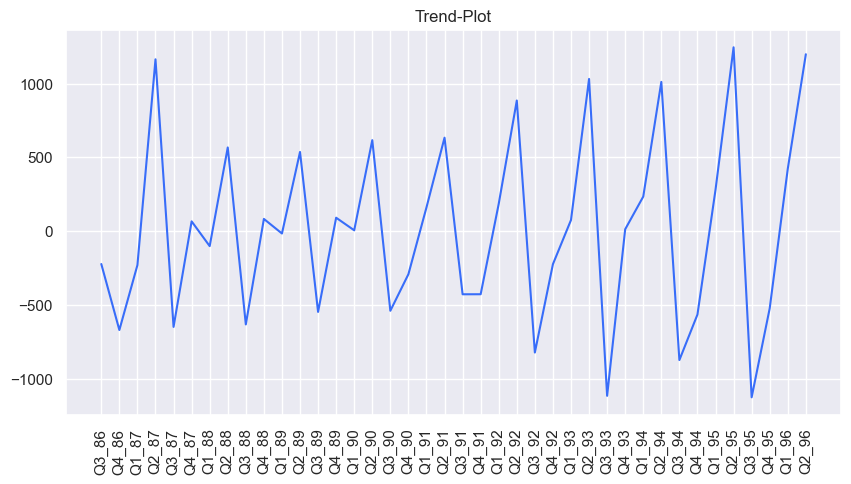

In [9]:
plt.plot(df.index[2:],df['Second Order'][2:].values)
plt.title('Trend-Plot')
plt.xticks(rotation=90)
plt.show()

# 4 - ACF & PACF

In [10]:
## ACF
acfs = acf(df['First Order'][1:],nlags=45)
acfs

array([ 1.00000000e+00, -1.26981419e-01, -5.82481165e-01, -1.40789027e-01,
        7.71496140e-01, -1.45527970e-01, -4.52000935e-01, -8.72084762e-02,
        6.39895181e-01, -1.05905531e-01, -3.69200888e-01, -9.07728562e-02,
        5.36613287e-01, -1.36535011e-01, -3.43810793e-01, -4.09638449e-02,
        4.80234070e-01, -1.04610619e-01, -2.87942939e-01, -3.55019940e-02,
        3.97481661e-01, -1.13063531e-01, -2.22754444e-01, -4.28279299e-02,
        3.31747591e-01, -1.04697233e-01, -1.48255628e-01, -1.94271498e-02,
        2.49826780e-01, -1.17787096e-01, -1.64872305e-01,  2.58490870e-04,
        2.32847926e-01, -1.04459665e-01, -1.34616190e-01,  4.31712153e-02,
        1.72921616e-01, -9.95491665e-02, -1.01851323e-01,  1.34708151e-02,
        5.44303555e-02])

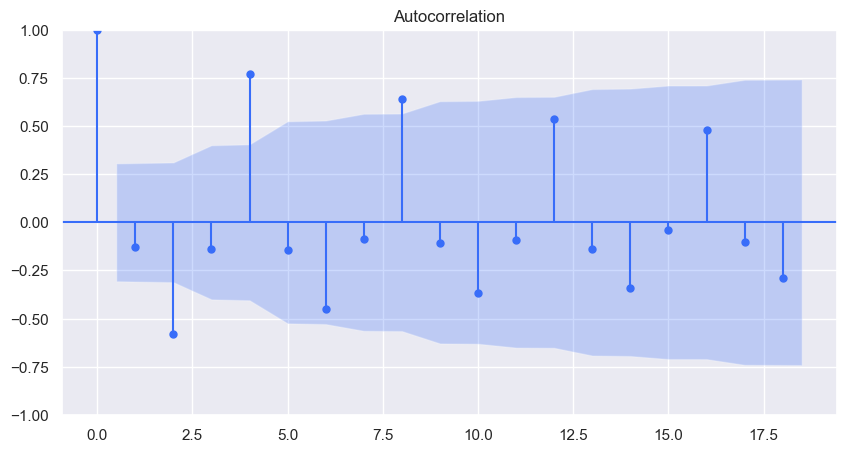

In [11]:
plot_acf(df['First Order'][1:],lags=18);

<h2 style="color:blue; font-family: Arial;">Observation :</h2>

<h3 style="color:black; font-family: Arial;"> Significant change over the interval of 4 lags variable<h3>

In [13]:
# PACF
pacfs = pacf(df['First Order'][1:],nlags=18)
pacfs

array([ 1.        , -0.13015595, -0.64013685, -0.6306896 ,  0.58559493,
       -0.39750543,  0.1046144 , -0.0772609 ,  0.18417045,  0.20544454,
       -0.00904403,  0.06302475,  0.30259239, -0.48114516, -0.13134357,
        0.0170421 , -0.28961627,  0.40252766, -0.28543162])

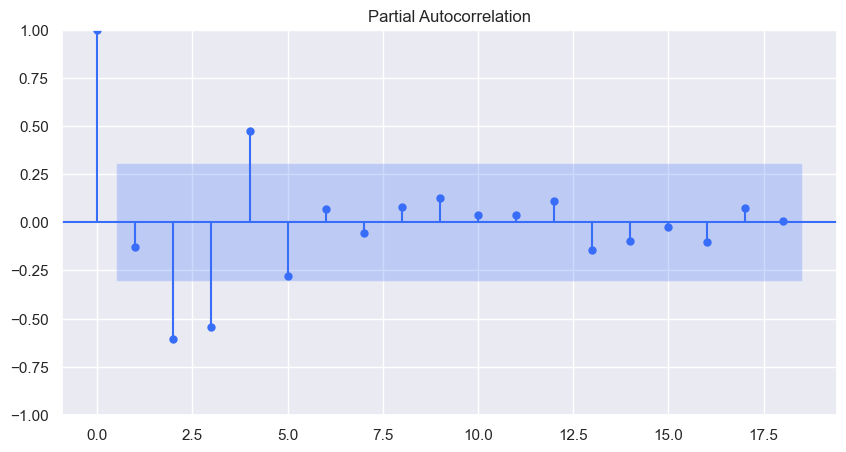

In [14]:
plot_pacf(df['First Order'][1:],lags=18);

<h2 style="color:blue; font-family: Arial;">Observation :</h2>

<h3 style="color:black; font-family: Arial;"> We can see direct correlation with 4 lags variable.<h3>

In [15]:
# Second order 
acfs_2 = acf(df['Second Order'][2:],nlags=18)
acfs_2

array([ 1.        , -0.23982225, -0.38267713, -0.24983537,  0.7693965 ,
       -0.19705087, -0.30335389, -0.2041167 ,  0.63118368, -0.15116405,
       -0.24531228, -0.16457556,  0.53539212, -0.14415283, -0.24016991,
       -0.11764592,  0.45886144, -0.12262558, -0.18818365])

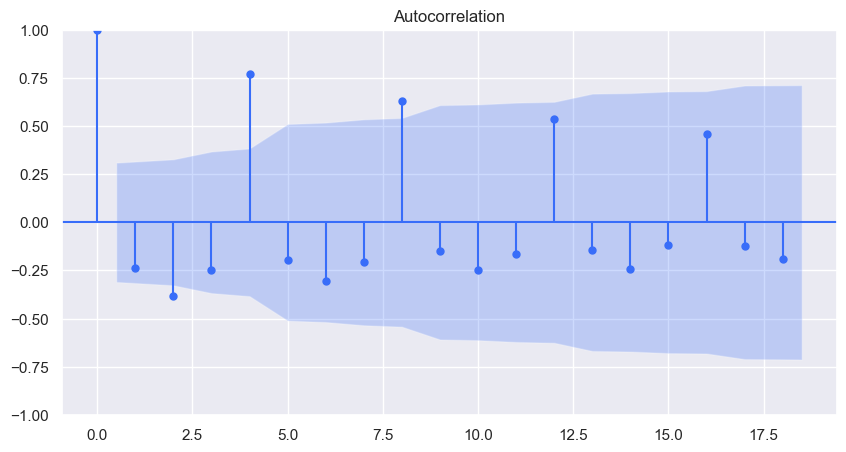

In [16]:
plot_acf(df['Second Order'][2:],lags=18);

In [17]:
# PACF
pacfs_2 = pacf(df['Second Order'][2:],nlags=18)
pacfs_2

array([ 1.        , -0.24597154, -0.49315701, -0.75855567,  0.5206846 ,
       -0.23167317, -0.10108477, -0.09022192,  0.07540586, -0.02038798,
       -0.02911506,  0.0304781 ,  0.24231446, -0.07145356, -0.23352189,
        0.03834016,  0.06070294, -0.09822948,  0.14115306])

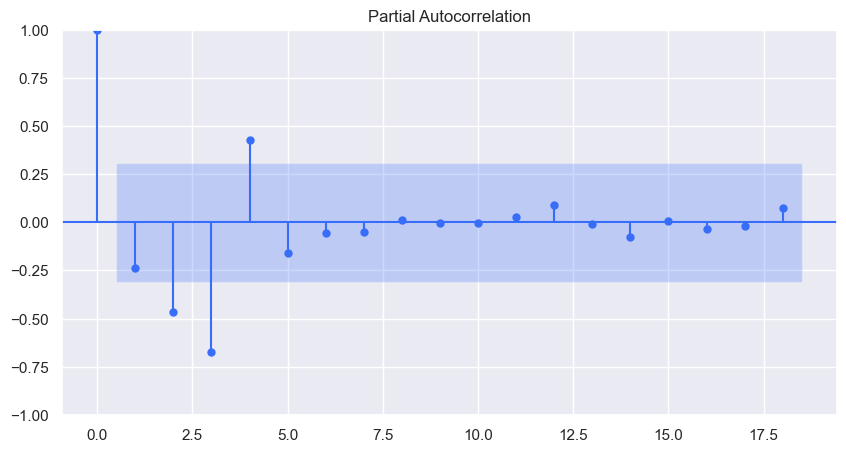

In [18]:
plot_pacf(df['Second Order'][2:],lags=18);

# 5 - Model & Prediction

In [19]:
to_row = int(len(df)*0.8) + 1
train = df.iloc[:to_row]
test = df.iloc[to_row:]

<h3 style="color:black; font-family: Arial;">Model Using Intitution</h3>


In [20]:
n_forecast = len(test)
train_list = list(train['Sales'].values)
preds = []
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(4,1,1))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.04it/s]


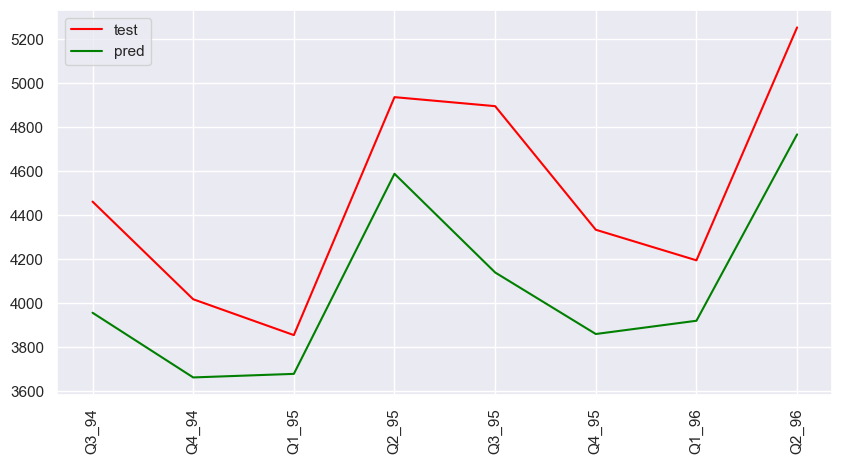

In [21]:
plt.plot(test.index,test['Sales'].values,color='red',label='test')
plt.plot(test.index,preds,color='green',label='pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [22]:
mse = np.sqrt(mean_squared_error(test['Sales'].values,preds))
mse

453.2034543889873

<h3 style="color:black; font-family: Arial;">Using auto arima</h3>


In [24]:

from pmdarima import auto_arima

In [25]:
order = auto_arima(df['Sales'])
order

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [26]:
n_forecast = len(test)
train_list = list(train['Sales'].values)
preds = []
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(4,1,0))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.10it/s]


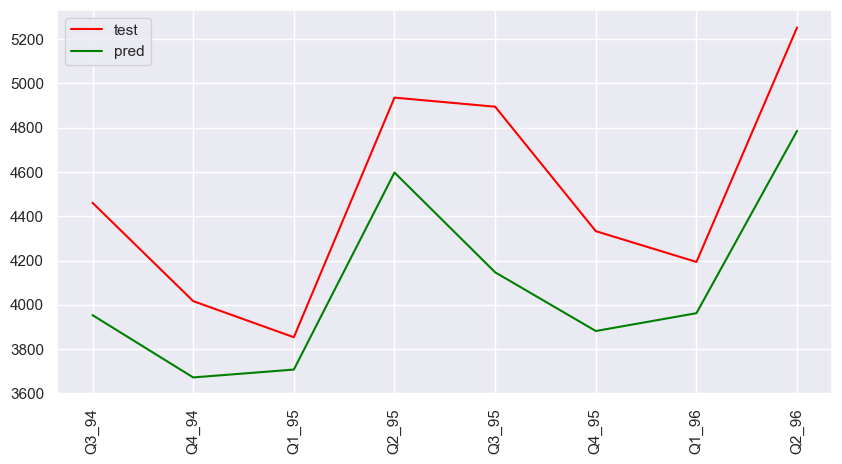

In [27]:
plt.plot(test.index,test['Sales'].values,color='red',label='test')
plt.plot(test.index,preds,color='green',label='pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [28]:
mse2 = np.sqrt(mean_squared_error(test['Sales'].values,preds))
mse2

439.63188326685247

# 6 - Experimental Model

In [29]:
n_forecast = len(test)
train_list = list(train['Sales'].values)
preds = []
for i in tqdm(range(n_forecast)):
    model = ARIMA(train_list,order=(4,1,6))
    model = model.fit()
    forecast = model.forecast()
    preds.append(forecast[0])
    train_list.pop(0)
    train_list.append(forecast[0])

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.74it/s]


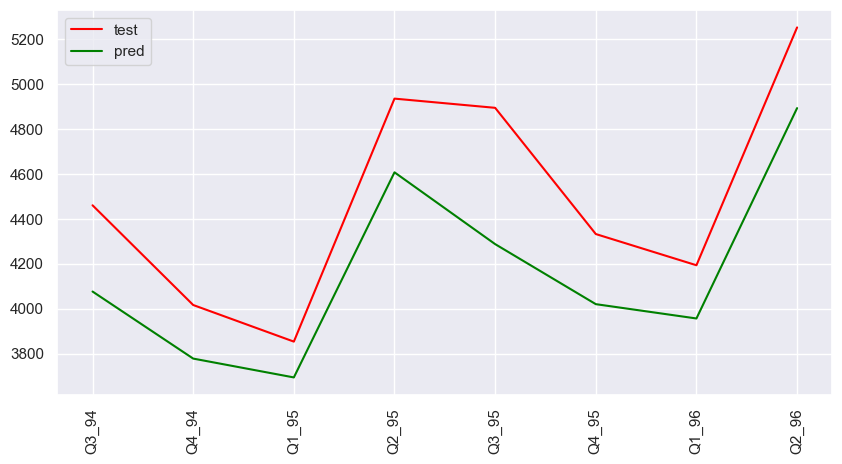

In [30]:

plt.plot(test.index,test['Sales'].values,color='red',label='test')
plt.plot(test.index,preds,color='green',label='pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [31]:
mse3 = np.sqrt(mean_squared_error(test['Sales'].values,preds))
mse3

351.51506244015786

In [32]:
out_data = {
    'Model': ['Intitution Model','Auto Arima Model','Experimental Model'],
    'Lag Variable': [4,4,4],
    'Order': [(4,1,1),(4,1,0),(4,1,6)],
    'MSE': [mse,mse2,mse3]
}

pd.DataFrame(out_data)

,Model,Lag Variable,Order,MSE
0,Intitution Model,4,"(4, 1, 1)",453.203454
1,Auto Arima Model,4,"(4, 1, 0)",439.631883
2,Experimental Model,4,"(4, 1, 6)",351.515062
